## sklearn.tree.DecisionTreeClassifier

* _class_ sklearn.tree.DecisionTreeClassifier(_*_, _criterion='gini'_, _splitter='best'_, _max_depth=None_, _min_samples_split=2_, _min_samples_leaf=1_, _min_weight_fraction_leaf=0.0_, _max_features=None_, _random_state=None_, _max_leaf_nodes=None_, _min_impurity_decrease=0.0_, _class_weight=None_, _ccp_alpha=0.0_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/364c77e04/sklearn/tree/_classes.py#L595)[¶](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier "Permalink to this definition")

* 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 깔끔하게 보이는 효과
%matplotlib inline

# Warning 무시
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=42)

dt_clf = DecisionTreeClassifier(random_state=0)

dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)

In [4]:

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
# export_graphviz(
#     dt_clf, out_file='treed.dot', class_names=iris_data.target_names,\
#     feature_names = iris_data.feature_names, impurity = True, filled = True
#     )

from sklearn.tree import export_graphviz

tree_dot = export_graphviz(
    dt_clf, 
    out_file="tree.dot",
    feature_names=iris.feature_names, 
    class_names=['0', '1', '2'],
    filled=True
)

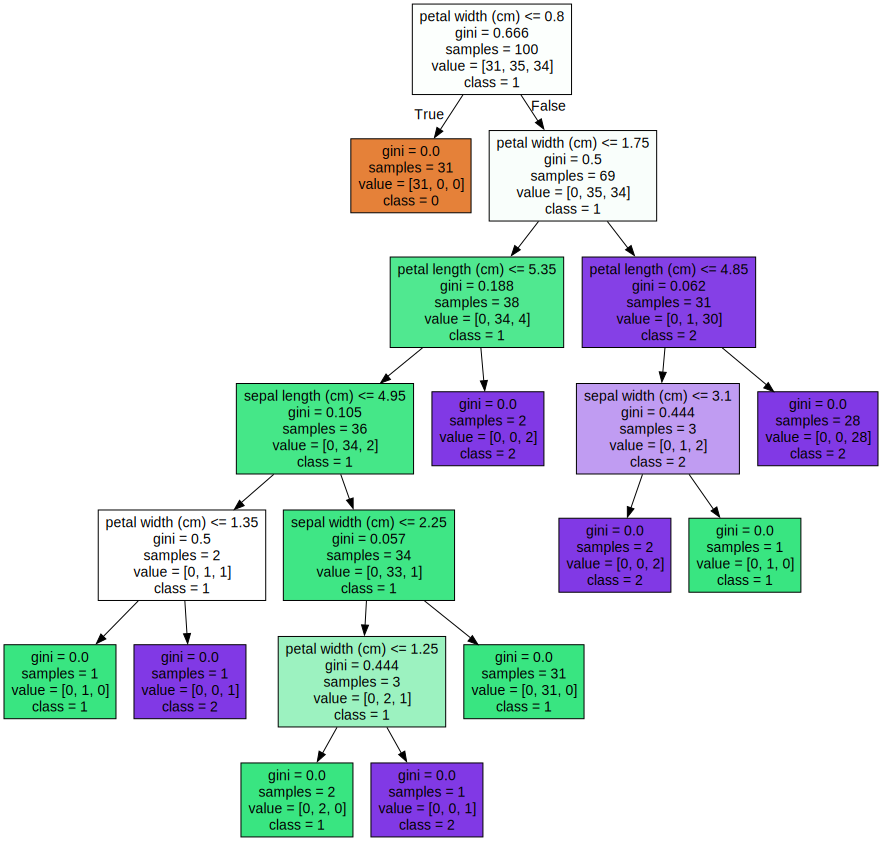

In [5]:
import graphviz

with open("tree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

In [ ]:
# Decision Tree에서 ~~
# 위 결과를 보면, 주로 사용한 피쳐를 알 수가 있다. (petal width를 많이 사용 -> information gain을 많이 준다)
# 이는 feature_importances_ attriubte를 사용해서 확인 할 수 있는데,
# feature selection 과정에서 feature_importances_ attribute를 사용하여 중요도를 확인해볼 수 있다

In [6]:
dt_clf.feature_importances_

array([0.01256535, 0.02915555, 0.05981177, 0.89846733])

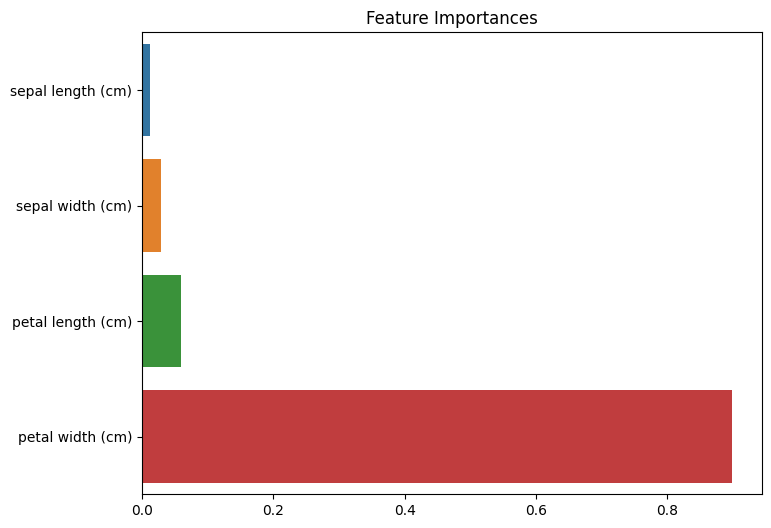

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)
plt.show()

다른 분기 시각화

In [8]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

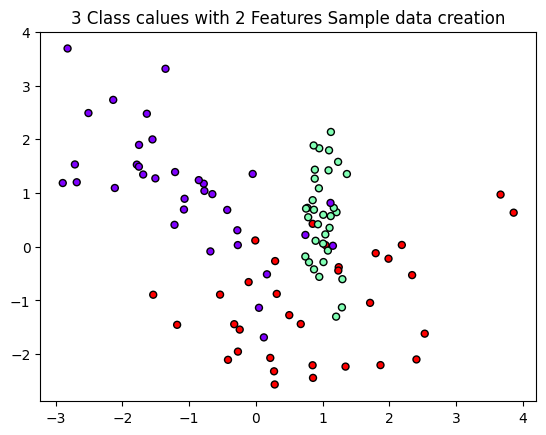

In [9]:
plt.title("3 Class calues with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스의 값은 다른 색깔로 표시됨
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolors='k')

In [14]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y) :
    fig,ax = plt.subplots()

    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolors='k', clim =((y.min(), y.max())), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_Start, xlim_end = ax.get_xlim()
    ylim_Start, ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이터로 model학습
    model.fit(X,y)

    # meshgrid 형태인 모든 좌표값으로 예측 수행
    xx, yy = np.meshgrid(np.linspace(xlim_Start, xlim_end, num=200), np.linspace(ylim_Start, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf()를 이용하여 class boundary를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha = 0.3, levels = np.arange(n_classes + 1) - 0.5, cmap = 'rainbow', clim = (y.min(), y.max()), zorder=1)



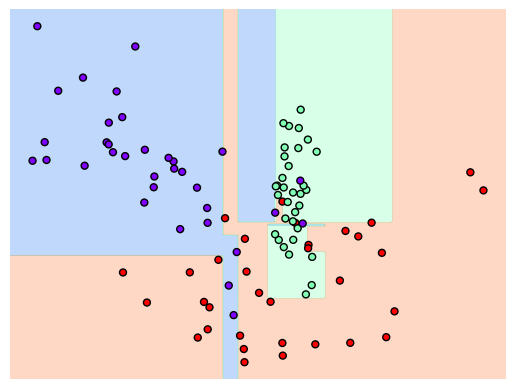

In [15]:
# 과적합 비교 위해 두가지 케이스로 비교
# case1. 하이퍼파라미터(min_samples_leaf) 조건 추가 하지 않은 경우

from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier(random_state=11).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

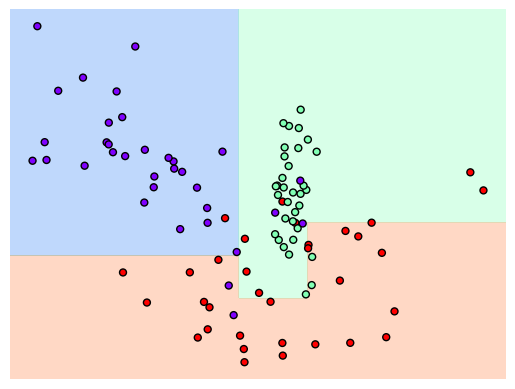

In [19]:
# case2. 하이퍼파라미터(min_samples_leaf) 조건 추가 한 경우

# 특정한 트리 생성 제약없는 결정 트리의 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier(random_state=11, min_samples_leaf = 6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)